## Solution plots, EZ model


We iterate with $Ag(x) = \phi(Kg(x))$ to get an approximate fixed point $g^*$, and then recover the fixed point of $T$ via $w^* = (g^*)^{1/\theta}$.

Here

$$ \phi(t) = (\zeta^{1-\rho} + t^{1/\theta})^\theta $$

and

$$    Kg(x) = \beta^\theta \int g(y) \exp[ (1 - \gamma) y] q(x, y) dy $$

when $q(x, y)$ is the stochastic kernel of the process

$$    X_{t+1} = a X_t + b + \sigma W_{t+1} $$

To approximate we discretize the AR(1) process into a Markov matrix and replace the integral by a sum.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from scipy.linalg import eigvals
import quantecon as qe

In [131]:
n = 20  # size of state space

In [132]:
beta = 0.9
gamma = 2.5
rho = 0.66
sigma = 0.95
a = 0.9
b = 1.0
zeta = 1.0

In [133]:
theta = (1 - gamma) / (1 - rho)
mc = qe.rouwenhorst(n, b, sigma, a)
K = (beta**theta) * mc.P * np.exp((1 - gamma) * mc.state_values)

Spectral radius of $K$

In [134]:
max(abs(eigvals(K)))

0.28804125660078878

Value of $\theta$ and $\beta^\theta$

In [135]:
theta, beta**theta

(-4.411764705882353, 1.5917368911296275)

In [136]:
def phi(t):
    return (zeta**(1 - rho) + t**(1/theta))**theta

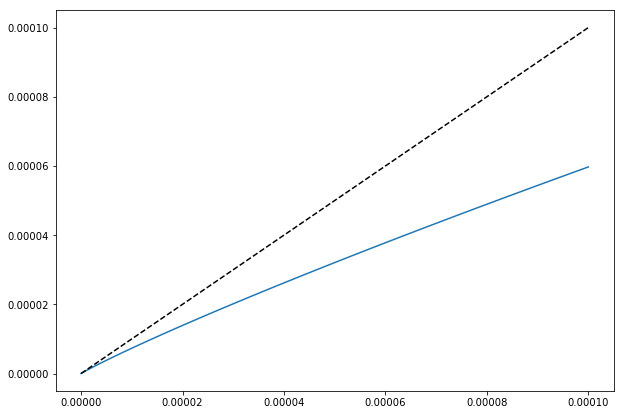

In [137]:
fig, ax = plt.subplots(figsize=(10, 7))
t = np.linspace(1e-18, 1e-4, 100)
ax.plot(t, phi(t))
ax.plot(t, t, 'k--')
plt.show()

In [138]:
g_init = zeta**(1 - rho) * np.ones(n)
tol = 1e-8
error = tol + 1
iterate = 0

g = g_init
while error > tol:
    new_g = phi(K @ g)
    error = max(abs(new_g - g))
    print(error)
    g = new_g
    iterate += 1
    
w = g**(1/theta)

0.999999999993
0.0247749746409
0.00202488951106
0.000265406288432
4.50470391779e-05
8.97620812652e-06
1.98853972436e-06
4.73700173026e-07
1.18747258061e-07
3.08739768377e-08
8.24243116119e-09


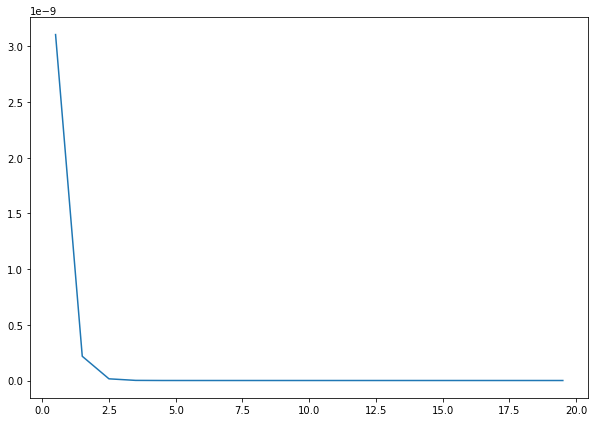

In [139]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(mc.state_values, g)
plt.show()

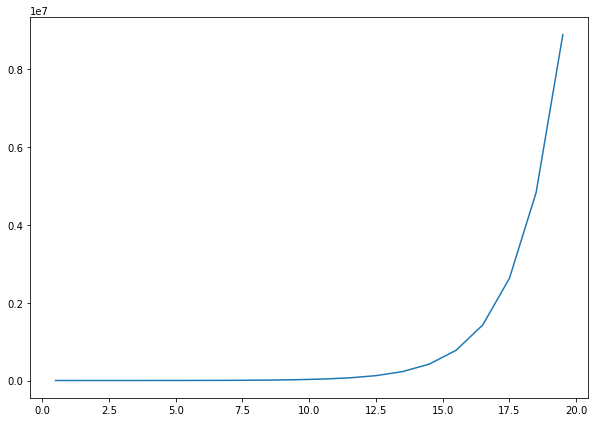

In [140]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(mc.state_values, w)
plt.show()